<a href="https://colab.research.google.com/github/onlyreynaldo/python-clustering-data/blob/main/Regr_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear Simples

In [1]:
import pandas as pd

In [2]:
pasta_raiz = '/content/drive/My Drive/datasets'

In [3]:
df = pd.read_csv(f'{pasta_raiz}/base_pulmao.csv')
df.head()

,taxa_fluxo_expiratorio,qtde_anos_exposto
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [4]:
df.describe()

,taxa_fluxo_expiratorio,qtde_anos_exposto
count,122.000000,122.000000
mean,365.655738,14.081967
std,105.132641,6.959850
min,110.000000,0.000000
25%,300.000000,7.000000
50%,365.000000,17.000000
75%,430.000000,20.000000
max,610.000000,23.000000


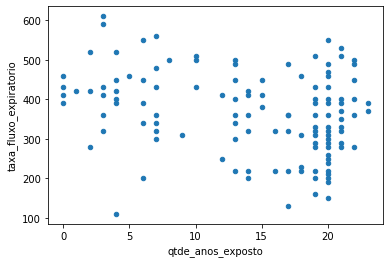

In [5]:
%matplotlib inline 
#se utiliza para versiones anteriores, en los mas nuevos no es necesario, era para decir a Jupiter renderizar su imagen
df.plot(kind='scatter', x='qtde_anos_exposto', y='taxa_fluxo_expiratorio')

In [6]:
X = df['qtde_anos_exposto'].copy()
y = df['taxa_fluxo_expiratorio'].copy()

In [7]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
X = sm.add_constant(X)

In [9]:
X.head()

,const,qtde_anos_exposto
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,1


In [10]:
modelo_rls = sm.regression.linear_model.OLS(y, X).fit()
# .fit para executar la instancia, hasta la parte de OLS(y, X) instancia para guardarlo en memoria

In [11]:
print(modelo_rls.summary());

                              OLS Regression Results                              
Dep. Variable:     taxa_fluxo_expiratorio   R-squared:                       0.077
Model:                                OLS   Adj. R-squared:                  0.069
Method:                     Least Squares   F-statistic:                     9.974
Date:                    Wed, 04 Nov 2020   Prob (F-statistic):            0.00201
Time:                            02:27:25   Log-Likelihood:                -735.68
No. Observations:                     122   AIC:                             1475.
Df Residuals:                         120   BIC:                             1481.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [12]:
print(modelo_rls.summary2())

                    Results: Ordinary least squares
Model:              OLS                    Adj. R-squared:     0.069    
Dependent Variable: taxa_fluxo_expiratorio AIC:                1475.3501
Date:               2020-11-04 02:27       BIC:                1480.9581
No. Observations:   122                    Log-Likelihood:     -735.68  
Df Model:           1                      F-statistic:        9.974    
Df Residuals:       120                    Prob (F-statistic): 0.00201  
R-squared:          0.077                  Scale:              10290.   
------------------------------------------------------------------------
                       Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------------
const                 424.5828  20.7960 20.4165 0.0000 383.4081 465.7575
qtde_anos_exposto      -4.1846   1.3250 -3.1582 0.0020  -6.8079  -1.5612
------------------------------------------------------------------------

In [13]:
# outra forma de fazer a regressao linear
import statsmodels.formula.api as smf

modelo = smf.ols('taxa_fluxo_expiratorio ~ qtde_anos_exposto', data=df).fit()
print(modelo.summary())

                              OLS Regression Results                              
Dep. Variable:     taxa_fluxo_expiratorio   R-squared:                       0.077
Model:                                OLS   Adj. R-squared:                  0.069
Method:                     Least Squares   F-statistic:                     9.974
Date:                    Wed, 04 Nov 2020   Prob (F-statistic):            0.00201
Time:                            02:27:29   Log-Likelihood:                -735.68
No. Observations:                     122   AIC:                             1475.
Df Residuals:                         120   BIC:                             1481.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

# Regressão linear multipla

In [14]:
dados = pd.read_excel(f'{pasta_raiz}/base_cheque.xls', sheet_name='cheque-especial')
dados.head()

,Código do Cliente,Idade,Rendimento\nTotal,Salário,Limite de Crédito Imediato,Valor Total\ndo Patrimônio,Limite do Cheque Especial
0,1,81,6800.0,6800.0,380,299109,2000
1,2,35,5000.0,5000.0,1000,120000,1000
2,3,39,6320.0,6320.0,1550,100000,1640
3,4,70,10736.0,5214.0,400,100000,500
4,5,54,6000.0,6000.0,1790,171745,3600


In [15]:
!pip install pyjanitor

In [16]:
# limpando o nome das colunas
import janitor

dados = dados.clean_names().rename(columns={'rendimento\ntotal': 'rendimento_total', 'valor_total\ndo_patrimonio': 'valor_total_patrimonion'})
dados.head()

/usr/local/lib/python3.6/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


,codigo_do_cliente,idade,rendimento_total,salario,limite_de_credito_imediato,valor_total_patrimonion,limite_do_cheque_especial
0,1,81,6800.0,6800.0,380,299109,2000
1,2,35,5000.0,5000.0,1000,120000,1000
2,3,39,6320.0,6320.0,1550,100000,1640
3,4,70,10736.0,5214.0,400,100000,500
4,5,54,6000.0,6000.0,1790,171745,3600


In [17]:
y = dados['limite_do_cheque_especial'].copy()
X = dados.drop(['codigo_do_cliente', 'limite_do_cheque_especial'], axis=1)
X = sm.add_constant(X)

modelo_rlm = sm.regression.linear_model.OLS(y, X).fit()
print(modelo_rlm.summary())

                                OLS Regression Results                               
Dep. Variable:     limite_do_cheque_especial   R-squared:                       0.845
Model:                                   OLS   Adj. R-squared:                  0.827
Method:                        Least Squares   F-statistic:                     45.92
Date:                       Wed, 04 Nov 2020   Prob (F-statistic):           5.87e-16
Time:                               02:27:49   Log-Likelihood:                -441.42
No. Observations:                         48   AIC:                             894.8
Df Residuals:                             42   BIC:                             906.1
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

# Ajustando o modelo

In [18]:
y = dados['limite_do_cheque_especial'].copy()
X = dados.drop(['codigo_do_cliente', 'limite_do_cheque_especial', 'idade'], axis=1)
X = sm.add_constant(X)

modelo_rlm = sm.regression.linear_model.OLS(y, X).fit()
print(modelo_rlm.summary())

                                OLS Regression Results                               
Dep. Variable:     limite_do_cheque_especial   R-squared:                       0.845
Model:                                   OLS   Adj. R-squared:                  0.831
Method:                        Least Squares   F-statistic:                     58.64
Date:                       Wed, 04 Nov 2020   Prob (F-statistic):           7.41e-17
Time:                               02:27:52   Log-Likelihood:                -441.47
No. Observations:                         48   AIC:                             892.9
Df Residuals:                             43   BIC:                             902.3
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [19]:
y = dados['limite_do_cheque_especial'].copy()
X = dados.drop(['codigo_do_cliente', 'limite_do_cheque_especial', 'idade', 'rendimento_total'], axis=1)
X = sm.add_constant(X)

modelo_rlm = sm.regression.linear_model.OLS(y, X).fit()
print(modelo_rlm.summary())

                                OLS Regression Results                               
Dep. Variable:     limite_do_cheque_especial   R-squared:                       0.835
Model:                                   OLS   Adj. R-squared:                  0.824
Method:                        Least Squares   F-statistic:                     74.28
Date:                       Wed, 04 Nov 2020   Prob (F-statistic):           2.97e-17
Time:                               02:27:55   Log-Likelihood:                -442.97
No. Observations:                         48   AIC:                             893.9
Df Residuals:                             44   BIC:                             901.4
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------